# WIKIPEDIA PROJECT

## Data Scraping

In [4]:
from bs4 import BeautifulSoup
import csv
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
import time

# Configure headless mode for Chrome
chrome_options = Options()
chrome_options.add_argument('--headless')

driver = webdriver.Chrome(options=chrome_options)

# URL list
url_list = ['Homosexuality', 'Abortion', 'Benjamin Franklin', 'Elvis Presley', 'Euthanasia', 'Nicolaus Copernicus', 'Liancourt Rocks', 'Sherlock Holmes', 'Schizophrenia', 'Nuclear Power']

for url_str in url_list:

  if url_list.index(url_str) % 5 == 0 and url_list.index(url_str) != 0:
    time.sleep(300) # Sleep for 5 minutes to avoid being blocked by the server

  if ' ' in url_str:
    url_str = url_str.replace(' ', '%20')

  url = 'https://xtools.wmcloud.org/articleinfo/en.wikipedia.org/' + url_str

  # Fetch HTML content from the URL
  driver.get(url)
  # print(driver.page_source)
  html_content = driver.page_source

  # Parse the HTML content
  soup = BeautifulSoup(html_content, 'html.parser')

  # Find the year-count-charts class
  years_class = soup.find('section', id='year-counts')

  # Find the table
  table = years_class.findChild('table')

  # Extract headers
  headers = [header.text.strip() for header in table.find_all('th')]

  # Extract rows
  rows = []
  for row in table.find_all('tr'):
      rows.append([data.text.strip() for data in row.find_all('td')])

  # Write data to CSV file
  with open(f'{url_str}.csv', 'w', newline='') as csvfile:
      writer = csv.writer(csvfile)
      # Write headers
      writer.writerow(headers)
      # Write rows
      writer.writerows(rows)

  print(f"{url_str} CSV file has been created successfully!")

Homosexuality CSV file has been created successfully!
Abortion CSV file has been created successfully!
Benjamin%20Franklin CSV file has been created successfully!
Elvis%20Presley CSV file has been created successfully!
Euthanasia CSV file has been created successfully!
Nicolaus%20Copernicus CSV file has been created successfully!
Liancourt%20Rocks CSV file has been created successfully!
Sherlock%20Holmes CSV file has been created successfully!
Schizophrenia CSV file has been created successfully!
Nuclear%20Power CSV file has been created successfully!


## Data Cleaning

In [5]:
import csv

# List of file names
file_names = ['Homosexuality.csv', 'Abortion.csv', 'Benjamin%20Franklin.csv', 'Elvis%20Presley.csv', 'Euthanasia.csv', 'Nicolaus%20Copernicus.csv', 'Liancourt%20Rocks.csv', 'Sherlock%20Holmes.csv', 'Schizophrenia.csv', 'Nuclear%20Power.csv']

# Iterate over each file
for file_name in file_names:
    # Read the CSV file
    with open(file_name, 'r', newline='') as csvfile:
        reader = csv.reader(csvfile)
        rows = list(reader)
        
        # Replace 'Log events' with 'Protections' in the header row
        if 'Log events' in rows[0]:
            rows[0][rows[0].index('Log events')] = 'Protections'
    
    # Write the modified data back to the CSV file
    with open(file_name, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerows(rows)

    print(f"Column name replaced in {file_name}")


Column name replaced in Homosexuality.csv
Column name replaced in Abortion.csv
Column name replaced in Benjamin%20Franklin.csv
Column name replaced in Elvis%20Presley.csv
Column name replaced in Euthanasia.csv
Column name replaced in Nicolaus%20Copernicus.csv
Column name replaced in Liancourt%20Rocks.csv
Column name replaced in Sherlock%20Holmes.csv
Column name replaced in Schizophrenia.csv
Column name replaced in Nuclear%20Power.csv


## Statistical Analysis

### Lagged Cross Correlation to find Tau (the time after which the IPs and protections have the strongest correlation)

In [18]:
import pandas as pd
from scipy.stats import pearsonr

# Load data for each article into DataFrames
articles = ['Homosexuality', 'Abortion', 'Benjamin%20Franklin', 'Elvis%20Presley', 
            'Euthanasia', 'Nicolaus%20Copernicus', 'Liancourt%20Rocks', 
            'Sherlock%20Holmes', 'Schizophrenia', 'Nuclear%20Power']

# Dictionary to store results for each article
results = {}

for article in articles:
    # Load data into DataFrame
    df = pd.read_csv(f'{article}.csv')
    
    # Initialize variables to store results
    max_corr = float('-inf')
    max_tau = None
    max_r = None
    max_p = None
    
    # Calculate cross-correlation, r, and p-values
    for tau in range(-len(df) + 1, len(df)):
        # Calculate cross-correlation at current lag (tau)
        cross_corr = df['IPs'].autocorr(lag=tau)
        
        # Calculate Pearson correlation coefficient (r) and p-value
        r, p = pearsonr(df['IPs'].shift(tau).fillna(0), df['Protections'].fillna(0))
        
        # Update maximum correlation if necessary
        if r > max_corr:
            max_corr = r
            max_tau = tau
            max_r = r
            max_p = p
    
    # Store results for the current article
    results[article] = {'max_tau': max_tau, 'max_r': max_r, 'max_p': max_p}

# Display results for each article
for article, result in results.items():
    print(f"Article: {article}")
    print(f"Max Lag (tau): {result['max_tau']}")
    print(f"Pearson Correlation Coefficient (r): {result['max_r']}")
    print(f"P-value: {result['max_p']}\n")


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encounte

Article: Homosexuality
Max Lag (tau): 0
Pearson Correlation Coefficient (r): 0.865766332562645
P-value: 4.660524486893055e-08

Article: Abortion
Max Lag (tau): 0
Pearson Correlation Coefficient (r): 0.8373145069961759
P-value: 6.28241457632847e-07

Article: Benjamin%20Franklin
Max Lag (tau): 0
Pearson Correlation Coefficient (r): 0.7199856233438753
P-value: 7.289473899923825e-05

Article: Elvis%20Presley
Max Lag (tau): 1
Pearson Correlation Coefficient (r): 0.7581327380414606
P-value: 1.771789882782259e-05

Article: Euthanasia
Max Lag (tau): 1
Pearson Correlation Coefficient (r): 0.9591127687529112
P-value: 1.5222330569217976e-13

Article: Nicolaus%20Copernicus
Max Lag (tau): 0
Pearson Correlation Coefficient (r): 0.8654387554024865
P-value: 4.779550382178944e-08

Article: Liancourt%20Rocks
Max Lag (tau): 2
Pearson Correlation Coefficient (r): 0.7071361250351018
P-value: 0.0003376035296922914

Article: Sherlock%20Holmes
Max Lag (tau): 4
Pearson Correlation Coefficient (r): 0.7241584830

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encounte

### Graph to show the behaviour of IPs around the point of maximum protections

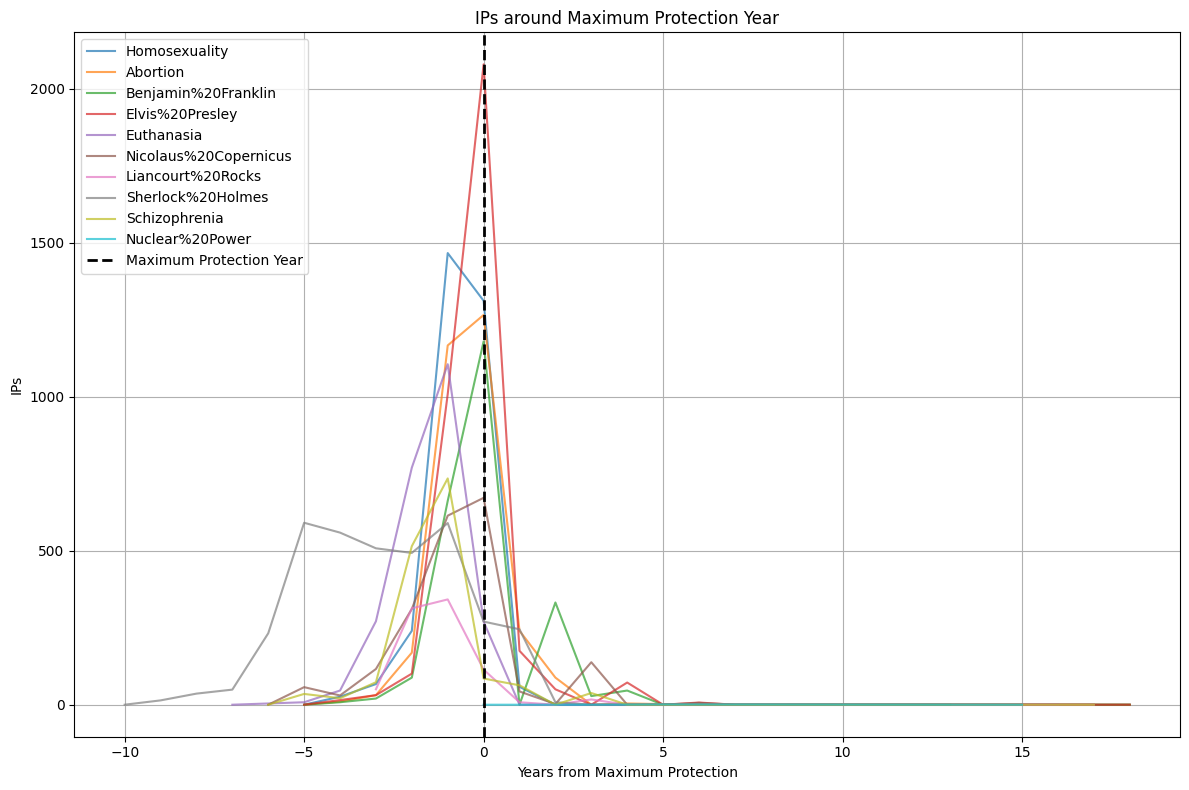

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

# Load data for each article into DataFrames
articles = ['Homosexuality', 'Abortion', 'Benjamin%20Franklin', 'Elvis%20Presley', 
            'Euthanasia', 'Nicolaus%20Copernicus', 'Liancourt%20Rocks', 
            'Sherlock%20Holmes', 'Schizophrenia', 'Nuclear%20Power']

# Set up the figure
plt.figure(figsize=(12, 8))

for idx, article in enumerate(articles):
    # Load data into DataFrame
    df = pd.read_csv(f'{article}.csv')
    
    # Center the maximum protection year around zero
    max_protection_idx = np.argmax(df['Protections'])
    centered_years = df['Year'] - df['Year'].iloc[max_protection_idx]
    
    # Plot IPs data
    plt.plot(centered_years, df['IPs'], label=article, alpha=0.7)

# Plot vertical line at the maximum protection year
plt.axvline(x=0, color='black', linestyle='--', linewidth=2, label='Maximum Protection Year')

# Set labels and title
plt.xlabel('Years from Maximum Protection')
plt.ylabel('IPs')
plt.title('IPs around Maximum Protection Year')
plt.legend(loc='upper left')
plt.grid(True)

plt.tight_layout()
plt.show()


### Exponential Decay Rate of IPs after protections are put in place and Visualisation

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


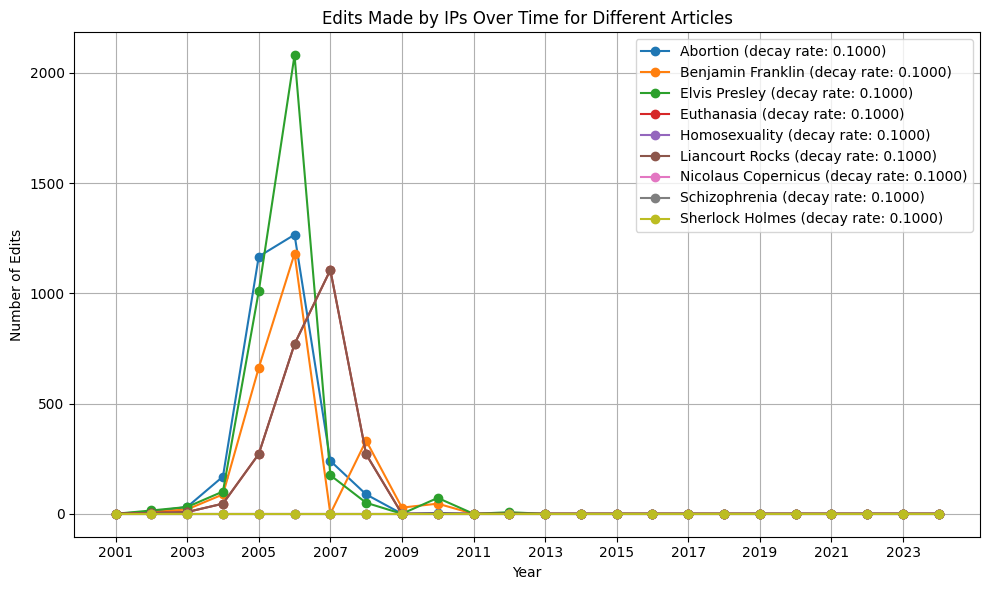

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Define the exponential decay function
def exponential_decay(x, N0, decay_rate):
    return N0 * np.exp(-decay_rate * x)

# Data for all articles
data = {
    "Abortion": [2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024],
    "Benjamin Franklin": [2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024],
    "Elvis Presley": [2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024],
    "Euthanasia": [2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024],
    "Homosexuality": [2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024],
    "Liancourt Rocks": [2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024],
    "Nicolaus Copernicus": [2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024],
    "Schizophrenia": [2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024],
    "Sherlock Holmes": [2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]
}

# Data for the edits made by IPs over time for each article
ip_data = {
    "Abortion": [0, 10, 31, 169, 1167, 1266, 240, 88, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    "Benjamin Franklin": [0, 8, 20, 88, 662, 1180, 0, 332, 28, 46, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    "Elvis Presley": [0, 15, 31, 101, 1009, 2080, 175, 50, 0, 72, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    "Euthanasia": [0, 4, 8, 46, 271, 770, 1106, 270, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    "Homosexuality": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    "Liancourt Rocks": [0, 4, 8, 46, 271, 770, 1106, 270, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    "Nicolaus Copernicus": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    "Schizophrenia": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    "Sherlock Holmes": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
}

# Calculate the exponential decay rate for each article
decay_rates = {}
for article, edits in ip_data.items():
    x_data = data[article]
    y_data = edits
    
    # Perform curve fitting to find the optimal parameters
    popt, pcov = curve_fit(exponential_decay, x_data, y_data, p0=[y_data[0], 0.1])
    N0_optimal, decay_rate_optimal = popt
    decay_rates[article] = decay_rate_optimal

# Plot the overlapped graphs
plt.figure(figsize=(10, 6))
for article, edits in ip_data.items():
    x_data = data[article]
    y_data = edits
    
    # Plot the actual data
    plt.plot(x_data, y_data, label=f"{article} (decay rate: {decay_rates[article]:.4f})", marker='o')

# Add labels and legend
plt.title("Edits Made by IPs Over Time for Different Articles")
plt.xlabel("Year")
plt.ylabel("Number of Edits")
plt.legend()
plt.grid(True)
plt.xticks(np.arange(2001, 2025, step=2))  # Adjust x-axis ticks
plt.tight_layout()

# Show plot
plt.show()


In [27]:
# Calculate the average decay rate for the 10 articles
average_decay_rate = np.mean(list(decay_rates.values()))

print("Average decay rate for the 10 articles:", average_decay_rate)


Average decay rate for the 10 articles: 0.1
